In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('dd.csv')
df.head()

,Mã tin,Loại BĐS,Khu vực,Địa chỉ,Diện tích (m2),Pháp lý,Giá (tỷ),Lộ giới (m),Số lầu,Số phòng ngủ,Số điện thoại liên hệ,Link truy cập
0,3500611,"Nhà ngõ, hẻm",Hồ Chí Minh,"Đường Nguyễn Ánh Thủ, Phường Trung Mỹ Tây, Qu...",80.0,Sổ hồng/ Sổ đỏ,6.99,6.0,3,4,0909.822.610,https://i-batdongsan.com/ban-nha-4-tang-nguyen...
1,4659719,Đất,Hà Nội,"Đường Long Khánh, Thị trấn Trạm Trôi, Huyện H...",75.0,Sổ hồng/ Sổ đỏ,4.20,5.0,0,0,0914.773.359,https://i-batdongsan.com/ban-dat-o-khu-cao-tru...
2,4813510,Biệt thự,Hà Nội,"Phường Văn Quán, Quận Hà Đông, Hà Nội",50.0,Sổ hồng/ Sổ đỏ,12.50,4.0,7,4,0944.723.177,https://i-batdongsan.com/-ban-toa-nha-mat-pho-...
3,4822936,Nhà mặt tiền,Hà Nội,"Đường Ao Sen, Phường Mộ Lao, Quận Hà Đông, Hà...",50.0,Sổ hồng/ Sổ đỏ,7.20,4.0,6,10,0944.723.177,https://i-batdongsan.com/-ban-nha-dong-tien-th...
4,4659316,"Nhà ngõ, hẻm",Hồ Chí Minh,"Đường Nguyễn Văn Lượng, Phường 10, Quận Gò Vấ...",55.0,Sổ hồng/ Sổ đỏ,5.25,6.0,1,2,0917.166.979,https://i-batdongsan.com/-go-vap-ban-gap-nha-d...


In [56]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('Mã tin')
num_cols = num_cols.drop('Giá (tỷ)')
num_cols

Index(['Diện tích (m2)', 'Lộ giới (m)', 'Số lầu', 'Số phòng ngủ'], dtype='object')

In [57]:
import numpy as np

In [58]:
values = df['Giá (tỷ)'].values

# Tính Q1, Q3, IQR
Q1 = np.percentile(values, 25)
Q3 = np.percentile(values, 75)
IQR = Q3 - Q1

# Lọc các giá trị ngoài khoảng [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
df = df[(values >= Q1 - 1.5*IQR) & (values <= Q3 + 1.5*IQR)]

In [59]:
df = df[(df['Khu vực'] == 'Hà Nội') | (df['Khu vực'] == 'Thành phố Hồ Chí Minh')]

# df = df[(df['Loại BĐS'] == 'Nhà mặt tiền')| (df['Loại BĐS'] == 'Nhà ngõ, hẻm')]

In [60]:
X = df[num_cols]
y = df['Giá (tỷ)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R-squared:', r2)

MSE: 99.64111479902544
R-squared: 0.4365049811031376


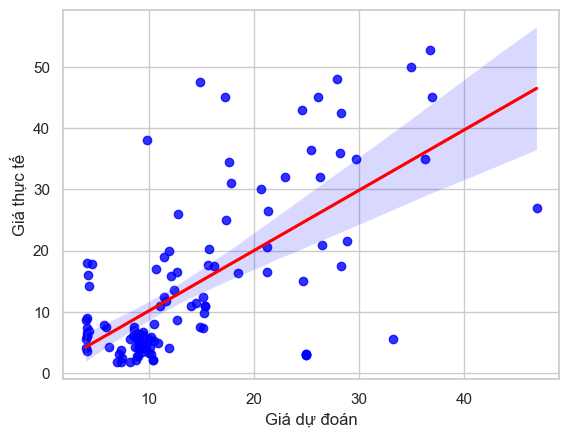

In [63]:
ax = sns.regplot(x=y_pred, y=y_test, color='blue') 

ax.lines[0].set_color('red')

ax.set(xlabel='Giá dự đoán', ylabel='Giá thực tế')
plt.show("Giá thực tế")